In [1]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

This setup is being used to compare and benchmark our models. First, the data is imported as pickle file. Then, we split it into train and testing sets. Depending on the model approach used, we use the exogeneous data (weather), or the endogen data (energy demand). In this baseline, a linear regression is being used.

After model training and the prediction, we compare our prediction to the actual data within 24h hours, 7 days and 28 days and calculate the corresponding RMSE. 

In [3]:
data = pd.read_pickle('../00_Data/data_full_with_holiday.pkl')

In [4]:
data_train = data.loc[data.index < '2023-10-30']
data_test = data.loc[data.index >= '2023-10-30']

In [5]:
X_train = data_train.drop('demand', axis=1)
X_test = data_test.drop('demand', axis=1)

y_train = data_train['demand']
y_train.name = 'Actual demand (train)'
y_test = data_test['demand']
y_test.name = 'Actual demand (test)'

# Model Implementation

In [6]:
# just as an example
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train, y_train)

LinearRegression()

## Prediction

In [9]:
y_pred = model.predict(X_test)

## Prediction Statistics

In [10]:
y_pred_s = pd.Series(y_pred, index=y_test.index, name='Predicted demand (test)')

### 24 Hours Forecast

In [11]:
y_pred_48 = y_pred_s.iloc[:48]
y_test_48 = y_test.iloc[:48]

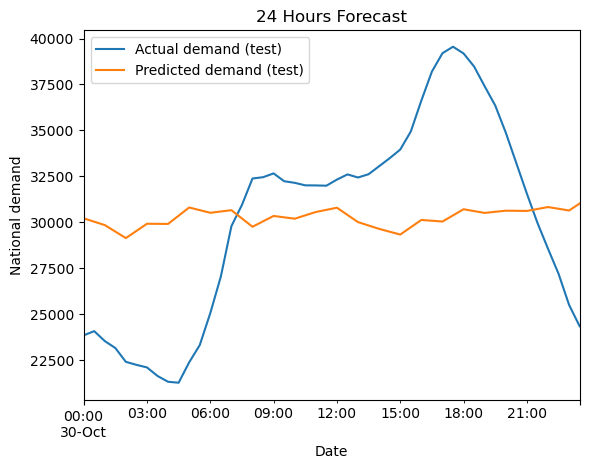

In [12]:
fig, ax = plt.subplots()
y_test_48.plot(ax=ax)
y_pred_48.plot(ax=ax)
ax.legend()
ax.set_title('24 Hours Forecast')
ax.set_xlabel("Date")
ax.set_ylabel("National demand")
plt.show()

In [13]:
print(f'RMSE for 24 hours: {mean_squared_error(y_test_48, y_pred_48, squared=False)}')

RMSE for 24 hours: 5490.074874764148


### 7 Days Prediction

In [14]:
y_pred_336 = y_pred_s.iloc[:336]
y_test_336 = y_test.iloc[:336]

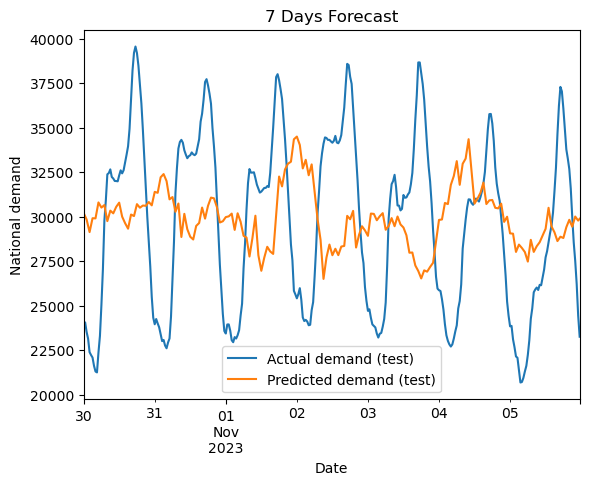

In [15]:
fig, ax = plt.subplots()
y_test_336.plot(ax=ax)
y_pred_336.plot(ax=ax)
ax.legend()
ax.set_title('7 Days Forecast')
ax.set_xlabel("Date")
ax.set_ylabel("National demand")
plt.show()

In [16]:
print(f'RMSE for 7 days: {mean_squared_error(y_test_336, y_pred_336, squared=False)}')

RMSE for 7 days: 5498.2305323542305


### 28 Days Prediction

In [17]:
y_pred_1344 = y_pred_s.iloc[:1344]
y_test_1344 = y_test.iloc[:1344]

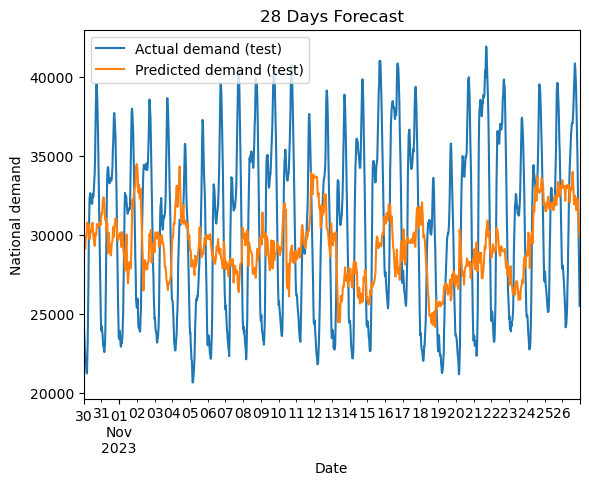

In [18]:
fig, ax = plt.subplots()
y_test_1344.plot(ax=ax)
y_pred_1344.plot(ax=ax)
ax.legend()
ax.set_title('28 Days Forecast')
ax.set_xlabel("Date")
ax.set_ylabel("National demand")
plt.show()

In [19]:
print(f'RMSE for 28 days: {mean_squared_error(y_test_1344, y_pred_1344, squared=False)}')

RMSE for 28 days: 6012.997821854461
